#**Handwritten Mnist Dataset Recognition**

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


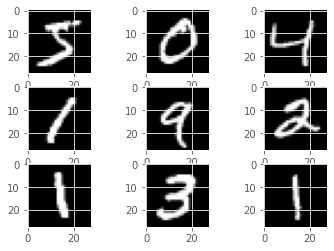

In [ ]:
# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot as plt
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [20]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15, 10)
import tensorflow
from matplotlib import pyplot
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from sklearn.metrics import accuracy_score

In [21]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [22]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

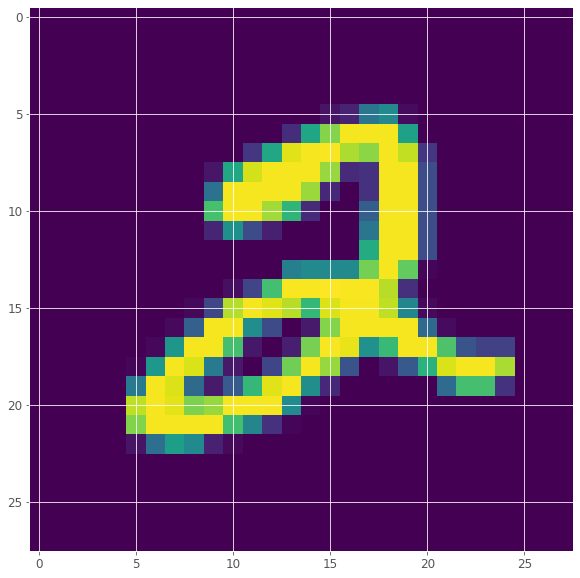

In [25]:
plt.imshow(X_train[5])

In [24]:
X_train = X_train/255
X_test = X_test/255

**Creating The Model**

In [26]:
model = Sequential()
model.add(Flatten(input_shape=(28,28))) #Flattening the data
model.add(Dense(128,activation='relu')) #input layer
model.add(Dense(32,activation='relu'))  #Hidden Layer
model.add(Dense(10,activation='softmax'))  #Output Layer

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.get_weights()[0]  #weights

array([[ 0.02917714, -0.07601495, -0.07840149, ...,  0.01478032,
        -0.00759245,  0.02517164],
       [ 0.07127409,  0.01003987, -0.04333233, ..., -0.04781285,
        -0.07195359, -0.0583474 ],
       [-0.07064716, -0.0580576 ,  0.0270419 , ...,  0.03688541,
        -0.06082644,  0.04435406],
       ...,
       [ 0.00241406,  0.02682362,  0.07135322, ..., -0.05183306,
        -0.07364545, -0.01000165],
       [ 0.00542507,  0.04006822,  0.00949207, ..., -0.04532722,
         0.01665882,  0.07753325],
       [ 0.03707634, -0.06484848,  0.04558655, ...,  0.04641137,
         0.03633212, -0.05370956]], dtype=float32)

In [29]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [30]:
# Train model
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2753 - accuracy: 0.9182 - val_loss: 0.1831 - val_accuracy: 0.9495
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1732 - accuracy: 0.9524 - val_loss: 0.1983 - val_accuracy: 0.9482
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1510 - accuracy: 0.9581 - val_loss: 0.1777 - val_accuracy: 0.9551
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1407 - accuracy: 0.9623 - val_loss: 0.1622 - val_accuracy: 0.9570
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1277 - accuracy: 0.9663 - val_loss: 0.1661 - val_accuracy: 0.9588
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1151 - accuracy: 0.9697 - val_loss: 0.1787 - val_accuracy: 0.9592
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1152 - accuracy: 0.9696 - val_loss: 0.1730 - val_accuracy:

In [31]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

In [32]:
print('The accuracy of our model is %0.2f' % (accuracy_score(y_test,y_pred)))

The accuracy of our model is 0.96


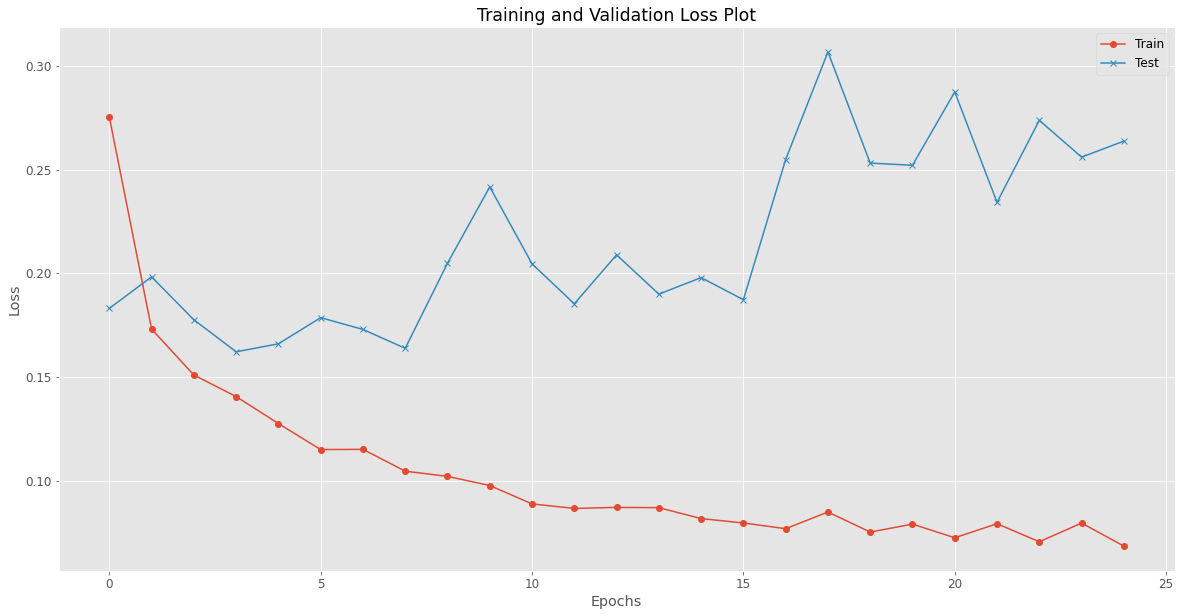

In [33]:
plt.figure(figsize=(20,10))
plt.title('Training and Validation Loss Plot')
pyplot.plot(range(0,25), history.history['loss'], '-o', label='Train')
pyplot.plot(range(0,25), history.history['val_loss'], '-x', label='Test')
pyplot.legend()
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.show()

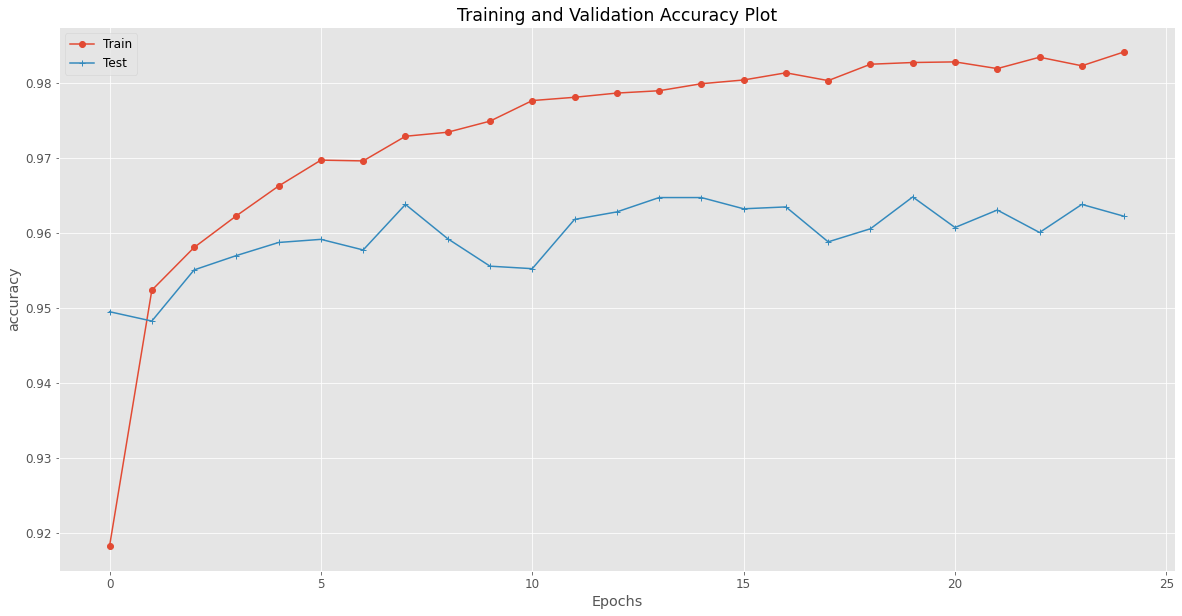

In [34]:
plt.figure(figsize=(20,10))
plt.title('Training and Validation Accuracy Plot')
pyplot.plot(range(0,25), history.history['accuracy'], '-o', label='Train')
pyplot.plot(range(0,25), history.history['val_accuracy'], '-+', label='Test')
pyplot.legend()
pyplot.xlabel('Epochs')
pyplot.ylabel('accuracy')
pyplot.show()

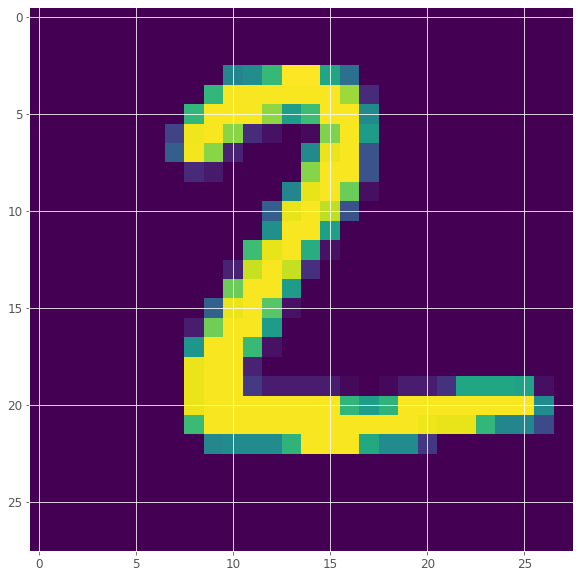

In [35]:
plt.imshow(X_test[1]);

In [36]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

array([2])

In [37]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0772 - accuracy: 0.9837 - val_loss: 0.3046 - val_accuracy: 0.9644
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0775 - accuracy: 0.9833 - val_loss: 0.3070 - val_accuracy: 0.9613
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0786 - accuracy: 0.9835 - val_loss: 0.2926 - val_accuracy: 0.9597
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0729 - accuracy: 0.9842 - val_loss: 0.2947 - val_accuracy: 0.9645
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0748 - accuracy: 0.9840 - val_loss: 0.2788 - val_accuracy: 0.9645
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0692 - accuracy: 0.9852 - val_loss: 0.3448 - val_accuracy: 0.9584
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0803 - accuracy: 0.9826 - val_loss: 0.3195 - val_accuracy:

In [38]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)
print('The accuracy of our model is %0.2f' % (accuracy_score(y_test,y_pred)))

The accuracy of our model is 0.97


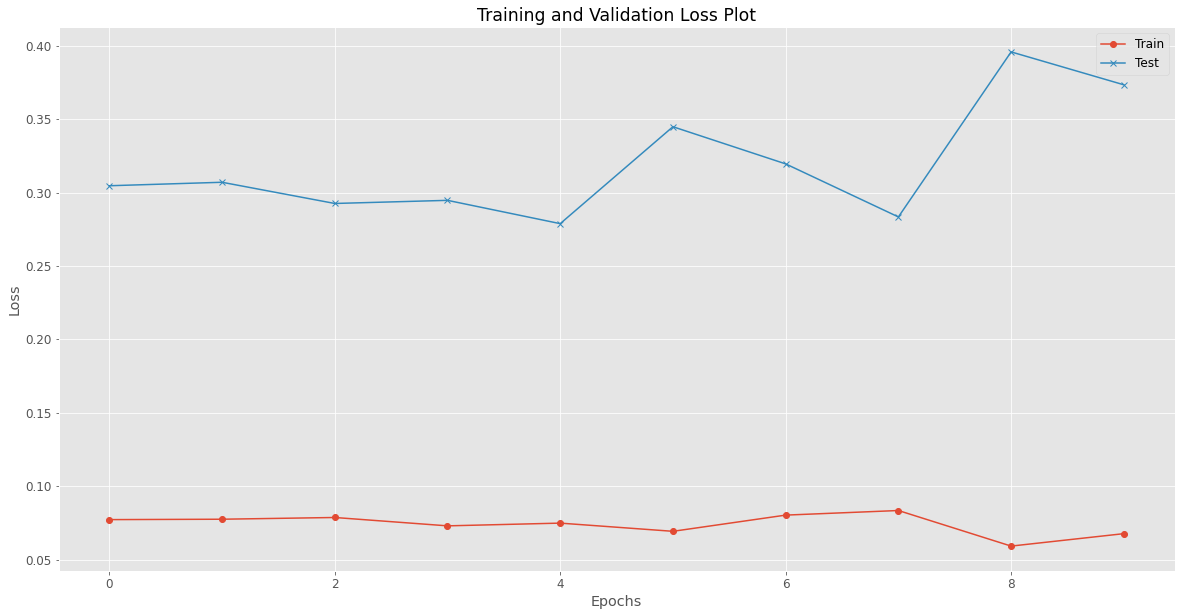

In [39]:
plt.figure(figsize=(20,10))
plt.title('Training and Validation Loss Plot')
pyplot.plot(range(0,10), history.history['loss'], '-o', label='Train')
pyplot.plot(range(0,10), history.history['val_loss'], '-x', label='Test')
pyplot.legend()
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.show()

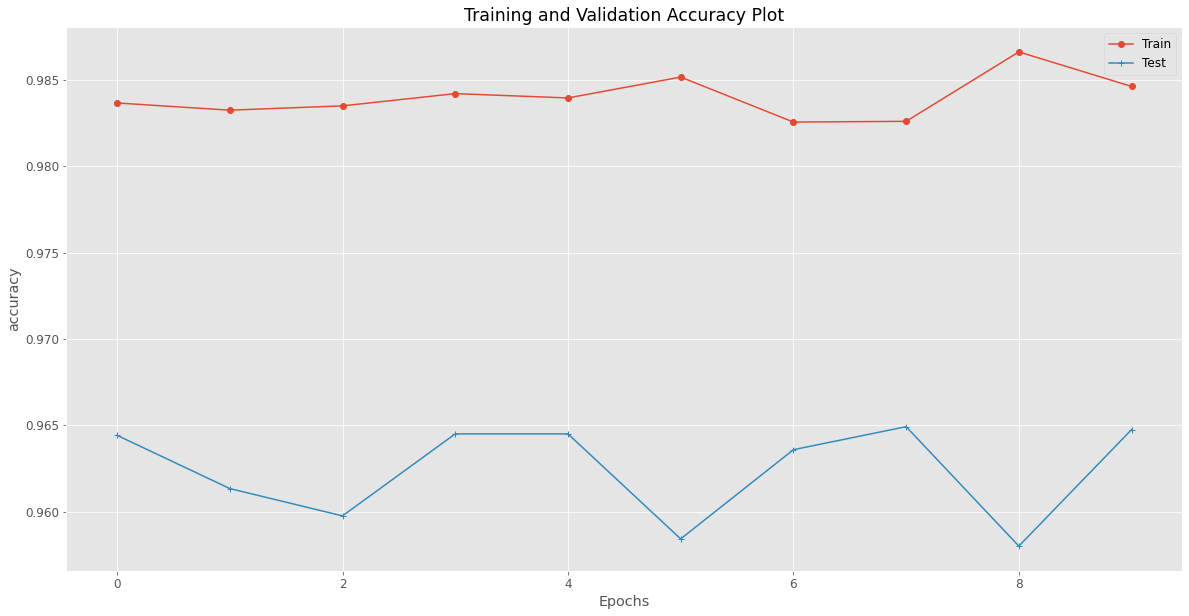

In [40]:
plt.figure(figsize=(20,10))
plt.title('Training and Validation Accuracy Plot')
pyplot.plot(range(0,10), history.history['accuracy'], '-o', label='Train')
pyplot.plot(range(0,10), history.history['val_accuracy'], '-+', label='Test')
pyplot.legend()
pyplot.xlabel('Epochs')
pyplot.ylabel('accuracy')
pyplot.show()